# Problema 4

In [1]:
import numpy as np # for numerical computing
import matplotlib.pyplot as plt # for plotting functions
from matplotlib import cm # colormap for color palette
from scipy.special import erfc

In [2]:
def PSKModem(M):
    #Generate reference constellation
    m = np.arange(0,M) #all information symbols m={0,1,...,M-1}
    I = 1/np.sqrt(2)*np.cos(m/M*2*np.pi)
    Q = 1/np.sqrt(2)*np.sin(m/M*2*np.pi)
    constellation = I + 1j*Q #reference constellation
    return constellation

def modulate(constellation,inputSymbols):
    modulatedVec = constellation[inputSymbols]
    return modulatedVec 

def demodulate(constellation,receivedSyms):
    # received vector and reference in cartesian form
    from scipy.spatial.distance import cdist
    XA = np.column_stack((np.real(receivedSyms),np.imag(receivedSyms)))
    XB = np.column_stack((np.real(constellation),np.imag(constellation)))
        
    d = cdist(XA,XB,metric='euclidean') #compute pair-wise Euclidean distances
    detectedSyms=np.argmin(d,axis=1)#indices corresponding minimum Euclid. dist.
    return detectedSyms

def awgn(s, SNRdB):
    gamma = 10**(SNRdB/10) #SNR to linear scale
    P=np.sum(abs(s)**2)/len(s) # power in the vector -> P=sum (X^{2})/M
    N0=P/gamma # noise spectral density
    n = np.sqrt(N0/2)*(np.random.randn(len(s)) + 1j*np.random.randn(len(s))) # AWGN with unity power
    r = s + n # received signal + noise
    return r

def psk_awgn(M,gamma_s):
    gamma_b = gamma_s/np.log2(M)
    if (M==2):
        SERs = 0.5*erfc(np.sqrt(gamma_b))
    elif M==4:
        Q = 0.5*erfc(np.sqrt(gamma_b))
        SERs = 2*Q-Q**2
    else:
        SERs = erfc(np.sqrt(gamma_s)*np.sin(np.pi/M))
    return SERs

## plot constellation

In [3]:
def plotConstellation(constellation,M):
    from math import log2
    fig, axs = plt.subplots(1, 1)
    axs.plot(np.real(constellation),np.imag(constellation),'o')
    for i in range(0,M):
        axs.annotate("{0:0{1}b}".format(i,int(log2(M))),(np.real(constellation[i]),np.imag(constellation[i])))
    axs.set_title('Constellation')
    axs.set_xlabel('I')
    axs.set_ylabel('Q')

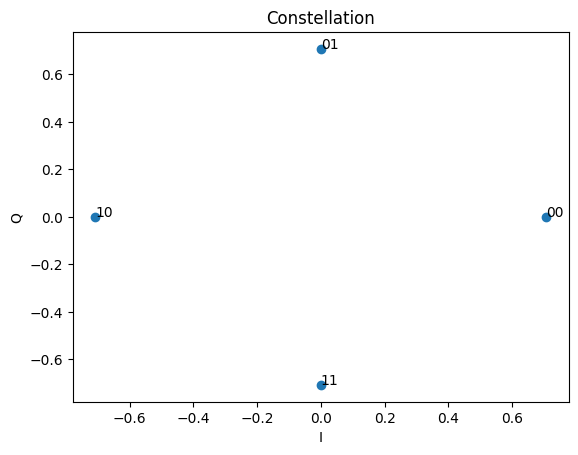

In [4]:
p = 2 # 4 power
M=2**p # number of points in QAM

constellation = PSKModem(M)
plotConstellation(constellation,M)

## add some noise and see the plot
for fun!

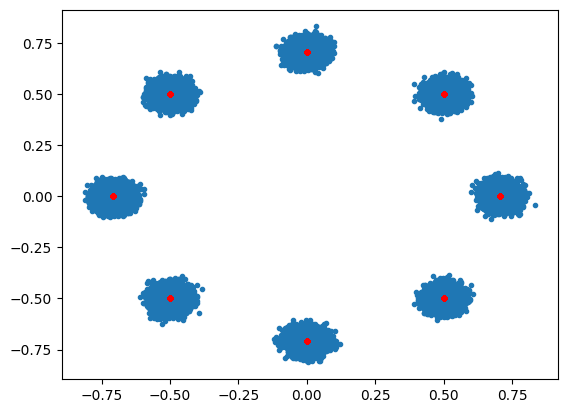

In [5]:
p = 3 # 4 power
M=2**p # number of points in QAM
num_symbols = int(1e5) # number of symbols
inputSyms = np.random.randint(low=0, high = M, size=num_symbols)
constellation = PSKModem(M)
C = modulate(constellation,inputSyms)
SNRdB=25
r = awgn(C,SNRdB)

fig, axs = plt.subplots(1,1)
axs.plot(np.real(r), np.imag(r), '.')
axs.plot(np.real(C), np.imag(C), '.r')
plt.show()

## modulate (no noise) -> demodulate received signal
and see that it checks out XD

In [6]:
p = 3 # 4 power
M=2**p # number of points in QAM
num_symbols = int(1e5) # number of symbols
inputSyms = np.random.randint(low=0, high = M, size=num_symbols)
constellation = PSKModem(M)
receivedSyms = modulate(constellation,inputSyms)

detectedSyms = demodulate(constellation,receivedSyms)

print(sum(detectedSyms-inputSyms))
print('it just works')

0
it just works


## **SER** and **BER** graphs

theoretical curves are here as well, so no reason to do it separate. just follow the instructions given in the code (uncomment 3 lines) and you'll see them alongside the simulated results.

(1e-06, 1)

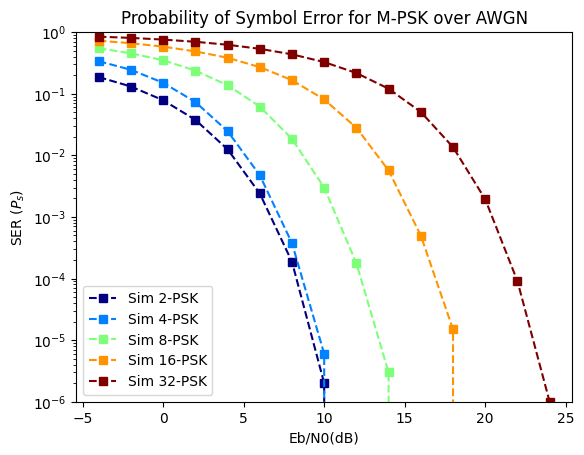

In [7]:
#---------Input Fields------------------------
nSym = 10**6 # Number of symbols to transmit # also, compile time for 10**6 is over 30s. for a quicker result do either 10**5 or 10**4
EbN0dBs = np.arange(start=-4,stop = 26, step = 2) # Eb/N0 range in dB for simulation
mod_type = 'PSK'
arrayOfM = [2,4,8,16,32]

colors = plt.cm.jet(np.linspace(0,1,len(arrayOfM))) # colormap
fig, ax = plt.subplots(nrows=1,ncols = 1)

for i, M in enumerate(arrayOfM):
    #-----Initialization of various parameters----
    k=np.log2(M)
    EsN0dBs = 10*np.log10(k)+EbN0dBs # EsN0dB calculation
    SER_sim = np.zeros(len(EbN0dBs)) # simulated Symbol error rates
    inputSyms = np.random.randint(low=0, high = M, size=nSym) # uniform random symbols from 0 to M-1
    
    constellation = PSKModem(M)
    modulatedSyms = modulate(constellation,inputSyms) #modulate

    for j,EsN0dB in enumerate(EsN0dBs):
        receivedSyms = awgn(modulatedSyms,EsN0dB) #add awgn noise
        detectedSyms = demodulate(constellation,receivedSyms)
        
        SER_sim[j] = np.sum(detectedSyms != inputSyms)/nSym
    
    
    ax.semilogy(EbN0dBs,SER_sim,color = colors[i],marker='s',linestyle='--',label='Sim '+str(M)+'-'+mod_type.upper())
    # in case you want to see the theoretical values plotted as well, uncomment the following lines:
    #gamma_s = np.log2(M)*(10**(EbN0dBs/10))
    #SER_theory = psk_awgn(M,gamma_s) #theory SER
    #ax.semilogy(EbN0dBs,SER_theory,color = colors[i],linestyle='-',label='Theory, '+str(M)+'-'+mod_type.upper())


ax.set_xlabel('Eb/N0(dB)')
ax.set_ylabel('SER ($P_s$)')
ax.set_title('Probability of Symbol Error for M-'+str(mod_type)+' over AWGN')
ax.legend()
ax.set_ylim(1e-6,1) # if you don't set the limit it will get goofy. leave this untouched.

$$P_{b}\approx \frac{P_{e}}{k}$$
isso é tirado do Proakis, eq. 4.3-20, onde $k$ nesse contexto é o número de bits, ou seja $M$ para nós.

(1e-06, 1)

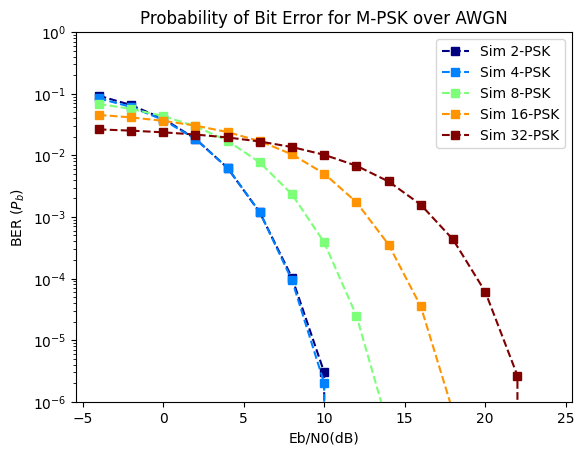

In [8]:
#---------Input Fields------------------------
nSym = 10**6 # Number of symbols to transmit # also, compile time for 10**6 is over 30s. for a quicker result do either 10**5 or 10**4
EbN0dBs = np.arange(start=-4,stop = 26, step = 2) # Eb/N0 range in dB for simulation
mod_type = 'PSK'
arrayOfM = [2,4,8,16,32]

colors = plt.cm.jet(np.linspace(0,1,len(arrayOfM))) # colormap
fig, ax = plt.subplots(nrows=1,ncols = 1)

for i, M in enumerate(arrayOfM):
    #-----Initialization of various parameters----
    k=np.log2(M)
    EsN0dBs = 10*np.log10(k)+EbN0dBs # EsN0dB calculation
    SER_sim = np.zeros(len(EbN0dBs)) # simulated Symbol error rates
    inputSyms = np.random.randint(low=0, high = M, size=nSym) # uniform random symbols from 0 to M-1
    
    constellation = PSKModem(M)
    modulatedSyms = modulate(constellation,inputSyms) #modulate

    for j,EsN0dB in enumerate(EsN0dBs):
        receivedSyms = awgn(modulatedSyms,EsN0dB) #add awgn noise
        detectedSyms = demodulate(constellation,receivedSyms)
        
        SER_sim[j] = np.sum(detectedSyms != inputSyms)/nSym
    
    
    ax.semilogy(EbN0dBs,SER_sim/M,color = colors[i],marker='s',linestyle='--',label='Sim '+str(M)+'-'+mod_type.upper())
    # in case you want to see the theoretical values plotted as well, uncomment the following lines:
    #gamma_s = np.log2(M)*(10**(EbN0dBs/10))
    #SER_theory = psk_awgn(M,gamma_s) #theory SER
    #ax.semilogy(EbN0dBs,SER_theory/M,color = colors[i],linestyle='-',label='Theory, '+str(M)+'-'+mod_type.upper())


ax.set_xlabel('Eb/N0(dB)')
ax.set_ylabel('BER ($P_b$)')
ax.set_title('Probability of Bit Error for M-'+str(mod_type)+' over AWGN')
ax.legend()
ax.set_ylim(1e-6,1) # if you don't set the limit it will get goofy. leave this untouched.